In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
from sklearn import tree

In [30]:
emails = pd.read_csv("emails.csv")

In [3]:
emails

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
y = emails["Prediction"].values
x = emails.drop(["Prediction","Email No."], axis=1)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

In [13]:
vector = CountVectorizer(stop_words = "english")

In [14]:
vector.fit(xtrain)

CountVectorizer(stop_words='english')

In [15]:
nb = MultinomialNB()

In [16]:
nb.fit(xtrain,ytrain)

MultinomialNB()

In [17]:
y_predict = nb.predict(xtest)

In [19]:
accuracy_score(y_predict, ytest)

0.9419953596287703

In [22]:
rfc = RandomForestClassifier()

In [23]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [24]:
y_predict2 = rfc.predict(xtest)

In [25]:
accuracy_score(y_predict2, ytest)

0.974477958236659

In [31]:
cm = confusion_matrix(y_predict, ytest)

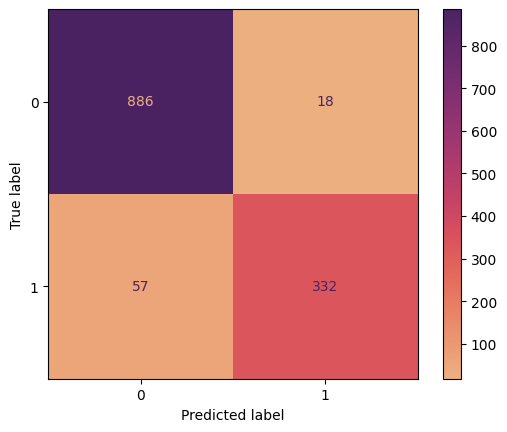

In [32]:
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_predict,ytest,labels=rfc.classes_),
                              display_labels=rfc.classes_)
cm.plot(cmap="flare")

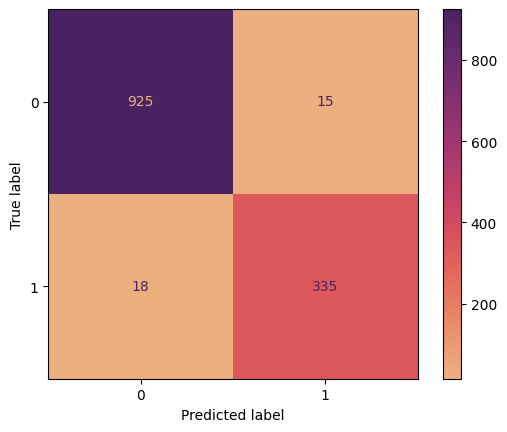

In [34]:
cm = confusion_matrix(y_predict2, ytest)
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_predict2,ytest,labels=rfc.classes_),
                              display_labels=rfc.classes_)
cm.plot(cmap="flare")